In [4]:
import numpy as np
import VBMicrolensing
import math
import matplotlib.pyplot as plt


In [5]:
# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03

In [19]:
#(t0 =0, tE=20, rho=0.01, u0_list=[.3, -.1, .9, -.4], q2=0.01, q3=0.005, s12=.9, s23=.3, alpha=45, phi=10)
# Separation between the first two lenses in descending order of mass in units of total ang. Einstein radii
s12 = 0.9

# Mass ratio lens 2
q2 = 0.01

# impact parameter
u0 = 0.2

# alpha
alpha= 3.212

# source radius in Einstein radii of the total mass.
rho = 0.01

# einstein radius crossing time
tE = 20

# time of peak magnification
t0 = 0

#separation between the last two lenses in descending order of mass in units of total ang. Einstein radii
s23=0.3

# Mass ratio lens 3
q3=0.005

# psi
psi=10


num_points = 1000
tmin = -50
tmax = 50
t = np.linspace(t0 + tmin, t0 + tmax, num_points)

params = [np.log(s12), np.log(q2), u0, alpha, np.log(rho), np.log(tE), t0, np.log(s23), np.log(q3), psi]

# Set the Method that you want use : Singlepoly, Multipoly, Nopoly.
VBM.SetMethod(VBM.Method.Nopoly)

magtriple, y1, y2 = VBM.TripleLightCurve(params, t)

In [20]:
caustics = VBM.Multicaustics()
criticalcurves = VBM.Multicriticalcurves()

(-0.4, -0.2)

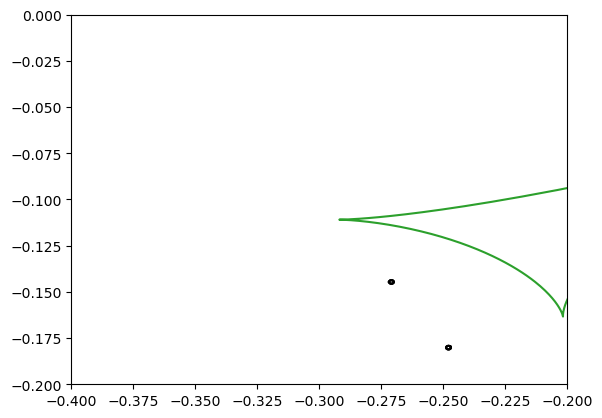

In [23]:
for cau in caustics:
    plt.plot(cau[0],cau[1])

    for crit in criticalcurves:
        plt.plot(crit[0], crit[1], 'k')
plt.plot(y1,y2)

plt.ylim(-.2, .0)
plt.xlim(-.4, -0.2)


In [10]:
?VBM.MultiImageContours

Docstring:
Image contours by a multiple lens. Remember to set the configuration by SetLensGeometry

Parameters
----------
y1 : float 
    x-position of the source in the source plane.
y2 : float 
    y-position of the source in the source plane.
rho : float 
    Source angular radius in units of the Einstein radius 
    corresponding to the total mass.

Returns
-------
listofimages: list[list[list[float], list[float]]]
    [images[list_of_x1,list_of_x2]]
    .
Type:      method

In [4]:
?VBM.Multicaustic

Object `VBM.Multicaustic` not found.


In [12]:
from ML import ThreeLens1S

In [13]:
trinary_event = ThreeLens1S(t0 =0, tE=20, rho=0.01, u0_list=[.1], q2=0.01, q3=0.005, s12=.9, s23=.3, alpha=45, phi=10)

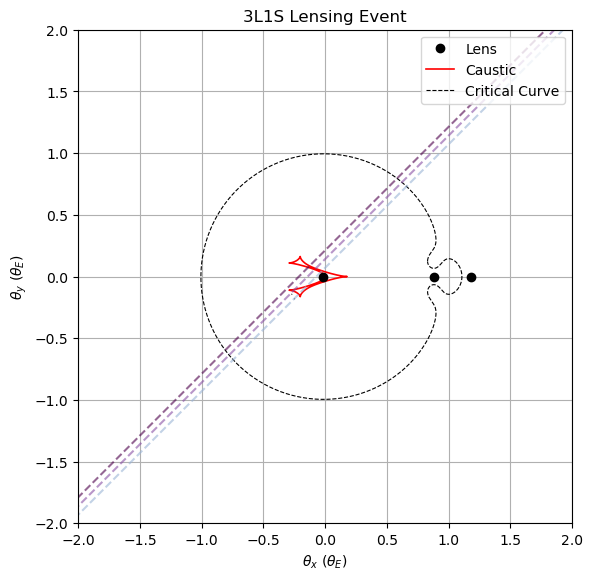

In [9]:
trinary_event.plot_caustic_critical_curves()

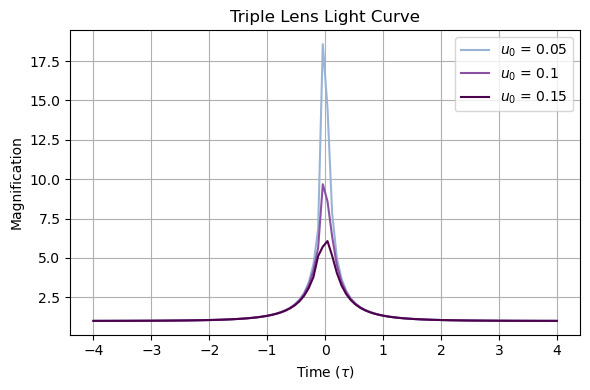

In [10]:
trinary_event.plot_light_curve()

In [11]:
trinary_event.animate()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

from ML import TwoLens1S
from ML import ThreeLens1S

In [5]:
def compare_star_planet(t0, tE, rho, u0_list, alpha, phi, s12, s23, q2, q3):
    #Star and Planet as One Lens
    m1 = 1
    m2 = q2 * m1
    m3 = q3 * m1
    q_2lens = m3 / (m1 + m2)
    s_eff = s12 + s23

    triple = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s12, s23, alpha, phi)
    double = TwoLens1S(t0, tE, rho, u0_list, q_2lens, s_eff, alpha)

    tau = triple.tau

    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(3, 2, figure=fig, height_ratios=[1.5, 1, .5])

    ax_cau_3l1s = fig.add_subplot(gs[0, 0])
    ax_cau_2l1s = fig.add_subplot(gs[0, 1])
    ax_lc_3l1s = fig.add_subplot(gs[1, 0])
    ax_lc_2l1s = fig.add_subplot(gs[1, 1])
    ax_resid = fig.add_subplot(gs[2, :])

    # --- Plot Triple Caustics ---
    triple._setting_parameters()
    caustics_3 = triple.VBM.Multicaustics()
    crits_3 = triple.VBM.Multicriticalcurves()
    for cau in caustics_3:
        ax_cau_3l1s.plot(cau[0], cau[1], 'r', lw=1.2)
    for crit in crits_3:
        ax_cau_3l1s.plot(crit[0], crit[1], 'k--', lw=0.8)
    for system in triple.systems:
        ax_cau_3l1s.plot(system['x_src'], system['y_src'], '--', color=system['color'], alpha=0.6)
    for x, y in triple._compute_lens_positions():
        ax_cau_3l1s.plot(x, y, 'ko')

    ax_cau_3l1s.set_title("3L1S Caustics")
    ax_cau_3l1s.set_xlim(-2, 2)
    ax_cau_3l1s.set_ylim(-2, 2)
    ax_cau_3l1s.set_aspect("equal")
    ax_cau_3l1s.grid(True)

    # --- Plot Double Caustics ---
    caustics_2 = double.VBM.Caustics(double.s, double.q)
    crits_2 = double.VBM.Criticalcurves(double.s, double.q)
    for cau in caustics_2:
        ax_cau_2l1s.plot(cau[0], cau[1], 'r', lw=1.2)
    for crit in crits_2:
        ax_cau_2l1s.plot(crit[0], crit[1], 'k--', lw=0.8)
    for system in double.systems:
        ax_cau_2l1s.plot(system['x_src'], system['y_src'], '--', color=system['color'], alpha=0.6)
    x1 = -double.s * double.q / (1 + double.q)
    x2 = double.s / (1 + double.q)
    ax_cau_2l1s.plot([x1, x2], [0, 0], 'ko')

    ax_cau_2l1s.set_title("2L1S Caustics")
    ax_cau_2l1s.set_xlim(-2, 2)
    ax_cau_2l1s.set_ylim(-2, 2)
    ax_cau_2l1s.set_aspect("equal")
    ax_cau_2l1s.grid(True)

    # --- Plot Light Curves ---
    for system in triple.systems:
        ax_lc_3l1s.plot(tau, system['mag'], color=system['color'], label=fr"$u_0$ = {system['u0']}")
    ax_lc_3l1s.set_title("3L1S Light Curve")
    ax_lc_3l1s.set_xlabel(r"Time ($\tau$)")
    ax_lc_3l1s.set_ylabel("Magnification")
    ax_lc_3l1s.grid(True)
    ax_lc_3l1s.legend()

    for system in double.systems:
        ax_lc_2l1s.plot(tau, system['mag'], color=system['color'], label=fr"$u_0$ = {system['u0']}")
    ax_lc_2l1s.set_title("2L1S Light Curve")
    ax_lc_2l1s.set_xlabel(r"Time ($\tau$)")
    ax_lc_2l1s.set_ylabel("Magnification")
    ax_lc_2l1s.grid(True)
    ax_lc_2l1s.legend()

    # --- Plot Residuals ---
    for d, t in zip(double.systems, triple.systems):
        residual = np.array(t['mag']) - np.array(d['mag'])
        ax_resid.plot(tau, residual, color=t['color'], label=fr"$u_0$ = {t['u0']}")

    ax_resid.set_title("Residuals (3L1S - 2L1S)")
    ax_resid.set_xlabel(r"Time ($\tau$)")
    ax_resid.set_ylabel("Residual")
    ax_resid.axhline(0, color='k', linestyle='--', lw=0.5)
    ax_resid.grid(True)
    ax_resid.legend()

    plt.tight_layout()
    plt.show()

    lens_positions = triple._compute_lens_positions()
    for x, y in lens_positions:
        ax_cau_3l1s.plot(x, y, 'ko')
    print("Lens positions (3L1S):", lens_positions)

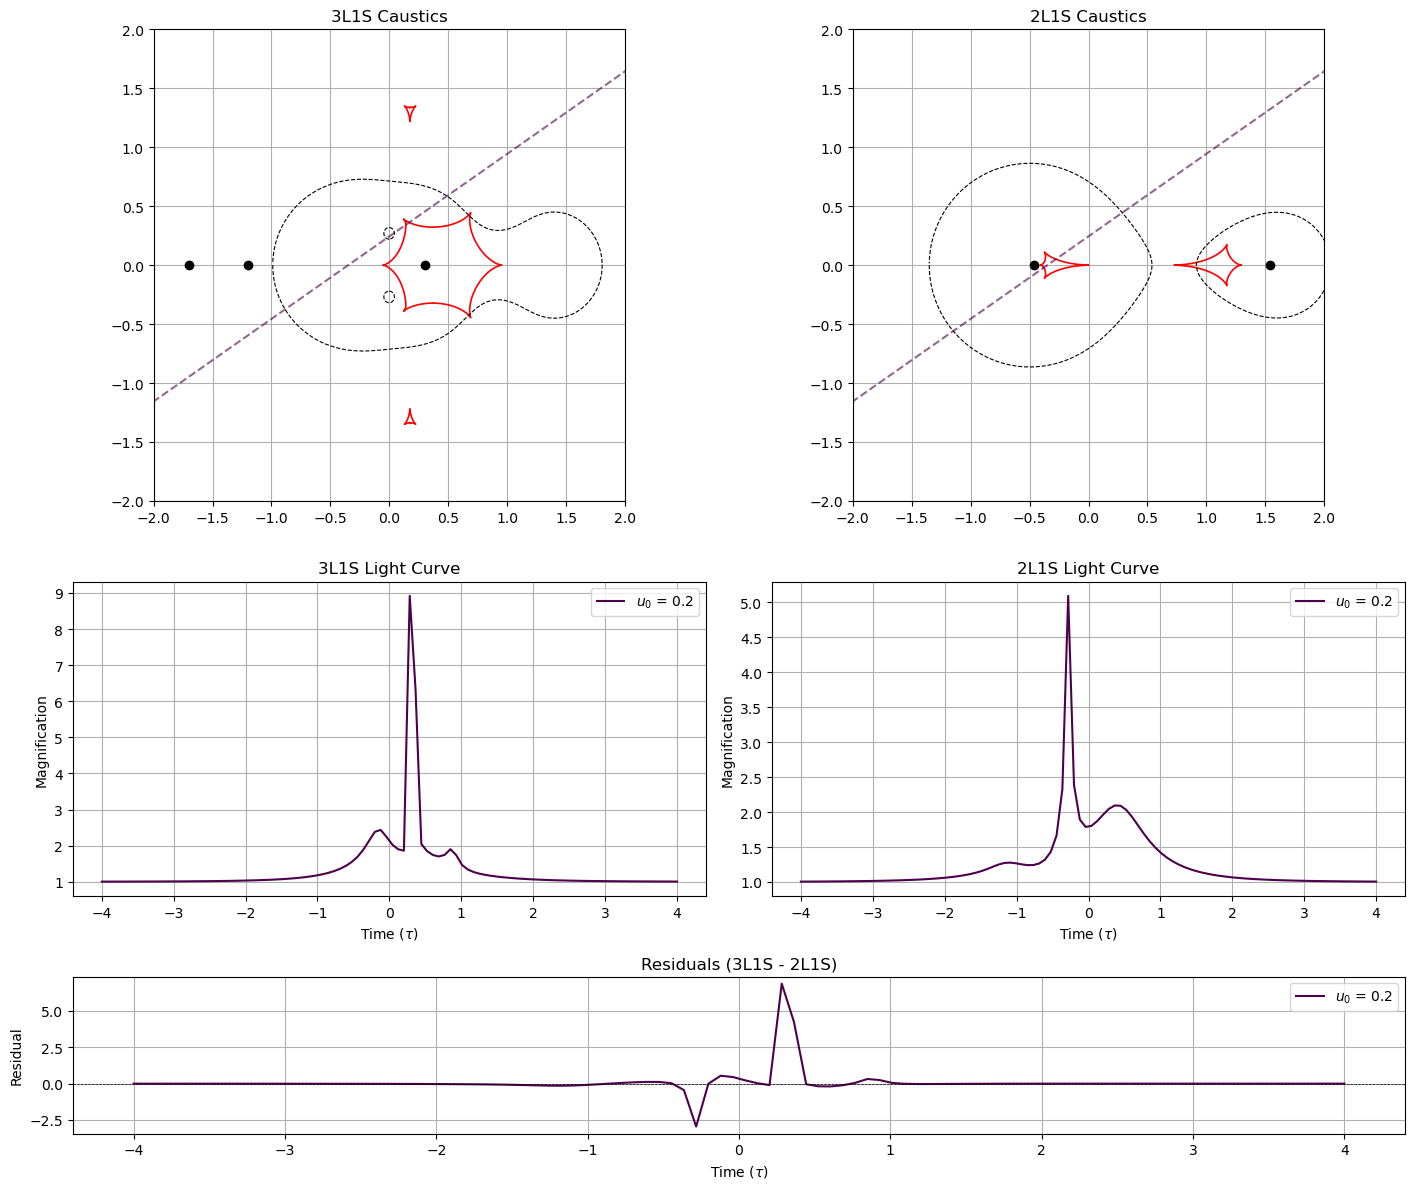

Lens positions (3L1S): [(-1.7, 0), (-1.2, 0), (0.30000000000000004, 0)]


In [ ]:
#compare_double_triple_lightcurves(t0, tE, rho, u0_list, alpha, phi, s12, s23, q2, q3)
compare_star_planet(  0, 20, 0.01, [.2],     35,    0,  .5,   1.5,  1, .006)

In [7]:
def compare_planet_moon(t0, tE, rho, u0_list, alpha, phi, s12, s23, q2, q3):
    #Planet and Moon as One Lens
    m1 = 1
    m2 = q2 * m1
    m3 = q3 * m1
    q_2lens = (m2 + m3)/m1
    s_eff = s23

    triple = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s12, s23, alpha, phi)
    double = TwoLens1S(t0, tE, rho, u0_list, q_2lens, s_eff, alpha)

    tau = triple.tau

    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(3, 2, figure=fig, height_ratios=[1.5, 1, .5])

    ax_cau_3l1s = fig.add_subplot(gs[0, 0])
    ax_cau_2l1s = fig.add_subplot(gs[0, 1])
    ax_lc_3l1s = fig.add_subplot(gs[1, 0])
    ax_lc_2l1s = fig.add_subplot(gs[1, 1])
    ax_resid = fig.add_subplot(gs[2, :])

    # --- Plot Triple Caustics ---
    triple._setting_parameters()
    caustics_3 = triple.VBM.Multicaustics()
    crits_3 = triple.VBM.Multicriticalcurves()
    for cau in caustics_3:
        ax_cau_3l1s.plot(cau[0], cau[1], 'r', lw=1.2)
    for crit in crits_3:
        ax_cau_3l1s.plot(crit[0], crit[1], 'k--', lw=0.8)
    for system in triple.systems:
        ax_cau_3l1s.plot(system['x_src'], system['y_src'], '--', color=system['color'], alpha=0.6)
    for x, y in triple._compute_lens_positions():
        ax_cau_3l1s.plot(x, y, 'ko')

    ax_cau_3l1s.set_title("3L1S Caustics")
    ax_cau_3l1s.set_xlim(-2, 2)
    ax_cau_3l1s.set_ylim(-2, 2)
    ax_cau_3l1s.set_aspect("equal")
    ax_cau_3l1s.grid(True)

    # --- Plot Double Caustics ---
    caustics_2 = double.VBM.Caustics(double.s, double.q)
    crits_2 = double.VBM.Criticalcurves(double.s, double.q)
    for cau in caustics_2:
        ax_cau_2l1s.plot(cau[0], cau[1], 'r', lw=1.2)
    for crit in crits_2:
        ax_cau_2l1s.plot(crit[0], crit[1], 'k--', lw=0.8)
    for system in double.systems:
        ax_cau_2l1s.plot(system['x_src'], system['y_src'], '--', color=system['color'], alpha=0.6)
    x1 = -double.s * double.q / (1 + double.q)
    x2 = double.s / (1 + double.q)
    ax_cau_2l1s.plot([x1, x2], [0, 0], 'ko')

    ax_cau_2l1s.set_title("2L1S Caustics")
    ax_cau_2l1s.set_xlim(-2, 2)
    ax_cau_2l1s.set_ylim(-2, 2)
    ax_cau_2l1s.set_aspect("equal")
    ax_cau_2l1s.grid(True)

    # --- Plot Light Curves ---
    for system in triple.systems:
        ax_lc_3l1s.plot(tau, system['mag'], color=system['color'], label=fr"$u_0$ = {system['u0']}")
    ax_lc_3l1s.set_title("3L1S Light Curve")
    ax_lc_3l1s.set_xlabel(r"Time ($\tau$)")
    ax_lc_3l1s.set_ylabel("Magnification")
    ax_lc_3l1s.grid(True)
    ax_lc_3l1s.legend()

    for system in double.systems:
        ax_lc_2l1s.plot(tau, system['mag'], color=system['color'], label=fr"$u_0$ = {system['u0']}")
    ax_lc_2l1s.set_title("2L1S Light Curve")
    ax_lc_2l1s.set_xlabel(r"Time ($\tau$)")
    ax_lc_2l1s.set_ylabel("Magnification")
    ax_lc_2l1s.grid(True)
    ax_lc_2l1s.legend()

    # --- Plot Residuals ---
    for d, t in zip(double.systems, triple.systems):
        residual = np.array(t['mag']) - np.array(d['mag'])
        ax_resid.plot(tau, residual, color=t['color'], label=fr"$u_0$ = {t['u0']}")

    ax_resid.set_title("Residuals (3L1S - 2L1S)")
    ax_resid.set_xlabel(r"Time ($\tau$)")
    ax_resid.set_ylabel("Residual")
    ax_resid.axhline(0, color='k', linestyle='--', lw=0.5)
    ax_resid.grid(True)
    ax_resid.legend()

    plt.tight_layout()
    plt.show()

    lens_positions = triple._compute_lens_positions()
    for x, y in lens_positions:
        ax_cau_3l1s.plot(x, y, 'ko')
    print("Lens positions (3L1S):", lens_positions)

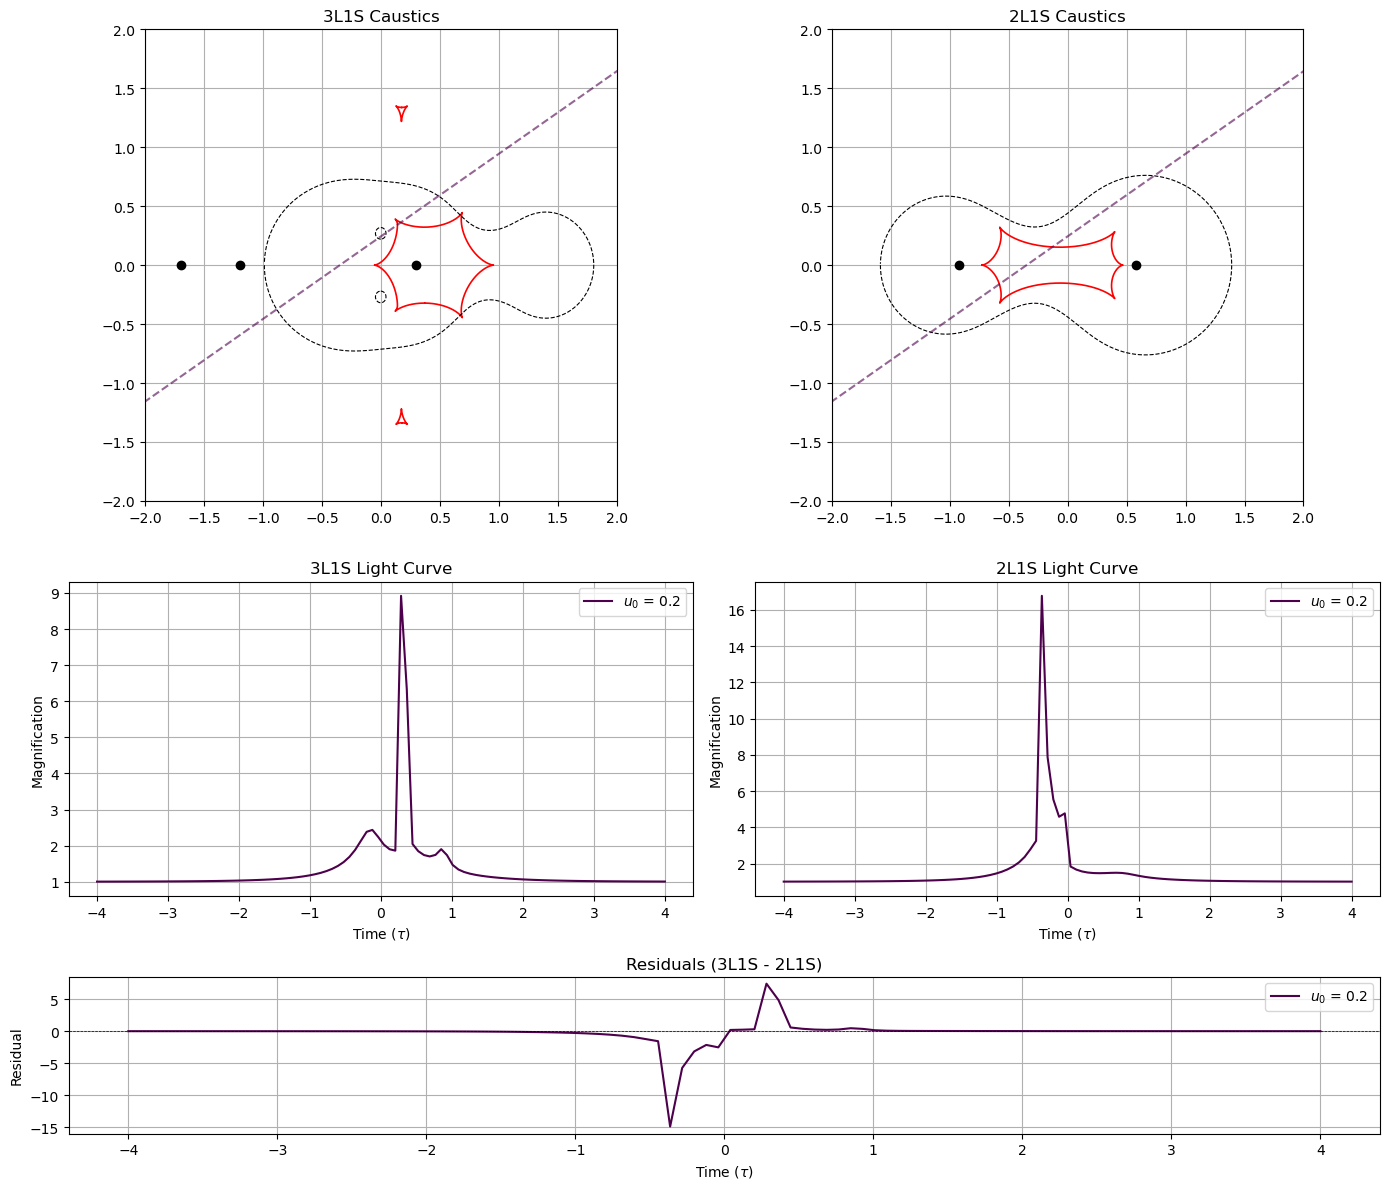

Lens positions (3L1S): [(-1.7, 0), (-1.2, 0), (0.30000000000000004, 0)]


In [8]:
compare_planet_moon(  0, 20, 0.01, [.2],     35,    0,  .5,   1.5,  1, .6)